<a href="https://colab.research.google.com/github/MbuyiseloNtando/Leaving_employees/blob/main/Causing_company_to_leave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

**Project problem :** What’s likely to make the employee leave the company

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('/content/HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [54]:
df.duplicated().sum()

3008

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df['left'].value_counts()/len(df)

,count
left,
0,0.833959
1,0.166041


#**EDA**

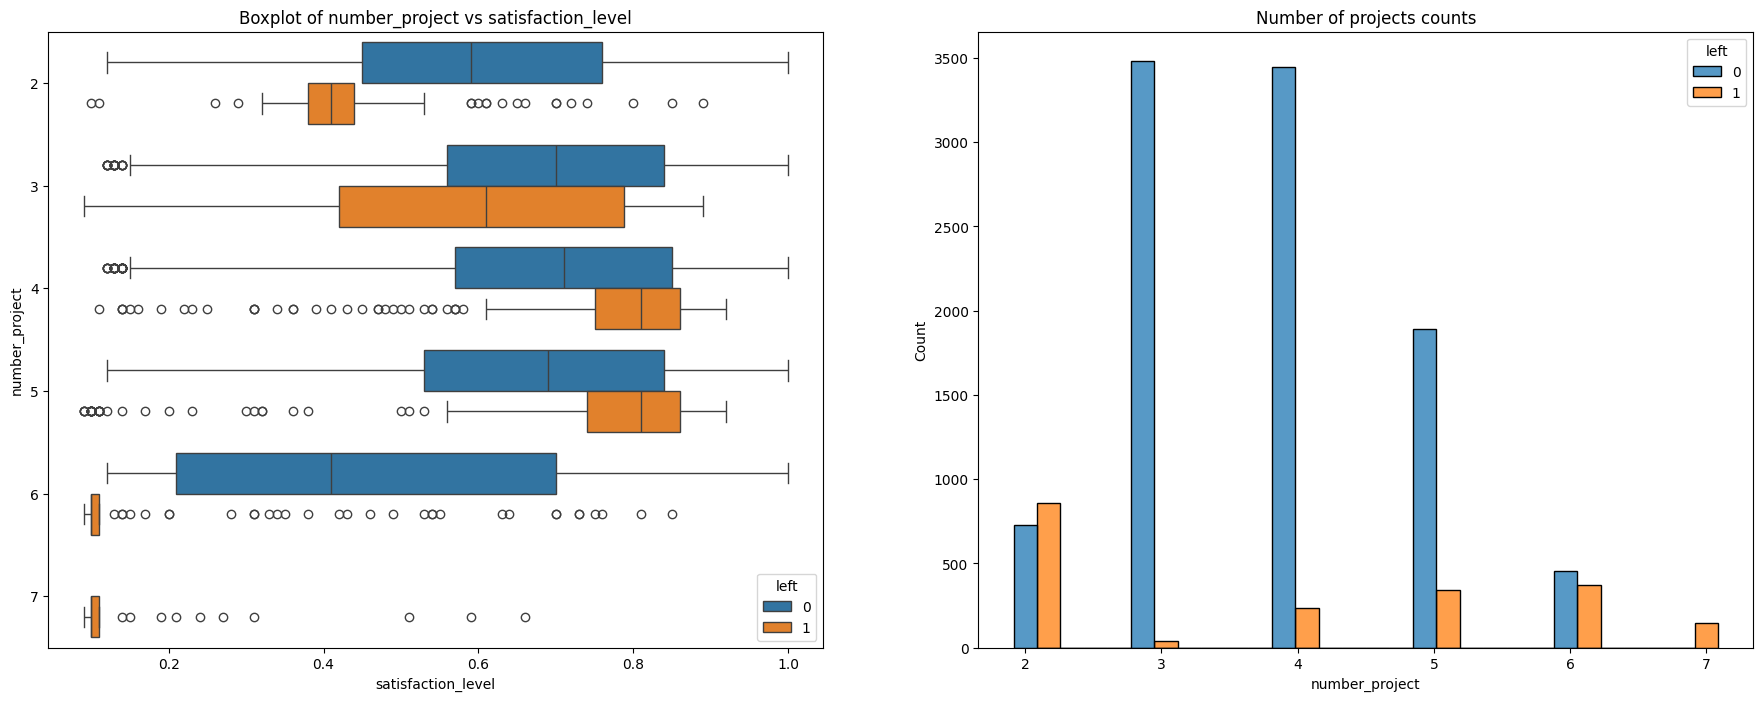

In [57]:
fig, (ax1, ax2)  =plt.subplots(1, 2, figsize = (22,8))
#fig.set_size_inches(12,6)
sns.boxplot(data=df, y='number_project', x='satisfaction_level',
            hue='left', orient='h', ax=ax1)
ax1.set_title('Boxplot of number_project vs satisfaction_level')

#sns.barplot(data=df, x='number_project', y='satisfaction_level',
 #           hue='left', ax=ax2);
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax2)
ax2.set_title('Number of projects counts');
# plot 2 subplots

It might be natural for the the employees with many project to show the highest unsartisfactory. This appears to be the case here.

1. Largest count of the number of left is at two projects with an average unstartisfactory of 0.4. Their unsatisfactory might not be due to the number of projects they had.

2. Employees with 7 projects all left, and they showed the lowest unsatisfactory. Both the variables might have caused them to leave the company.

2. Overall the employees who left never showed the unsactisfactory level of 1


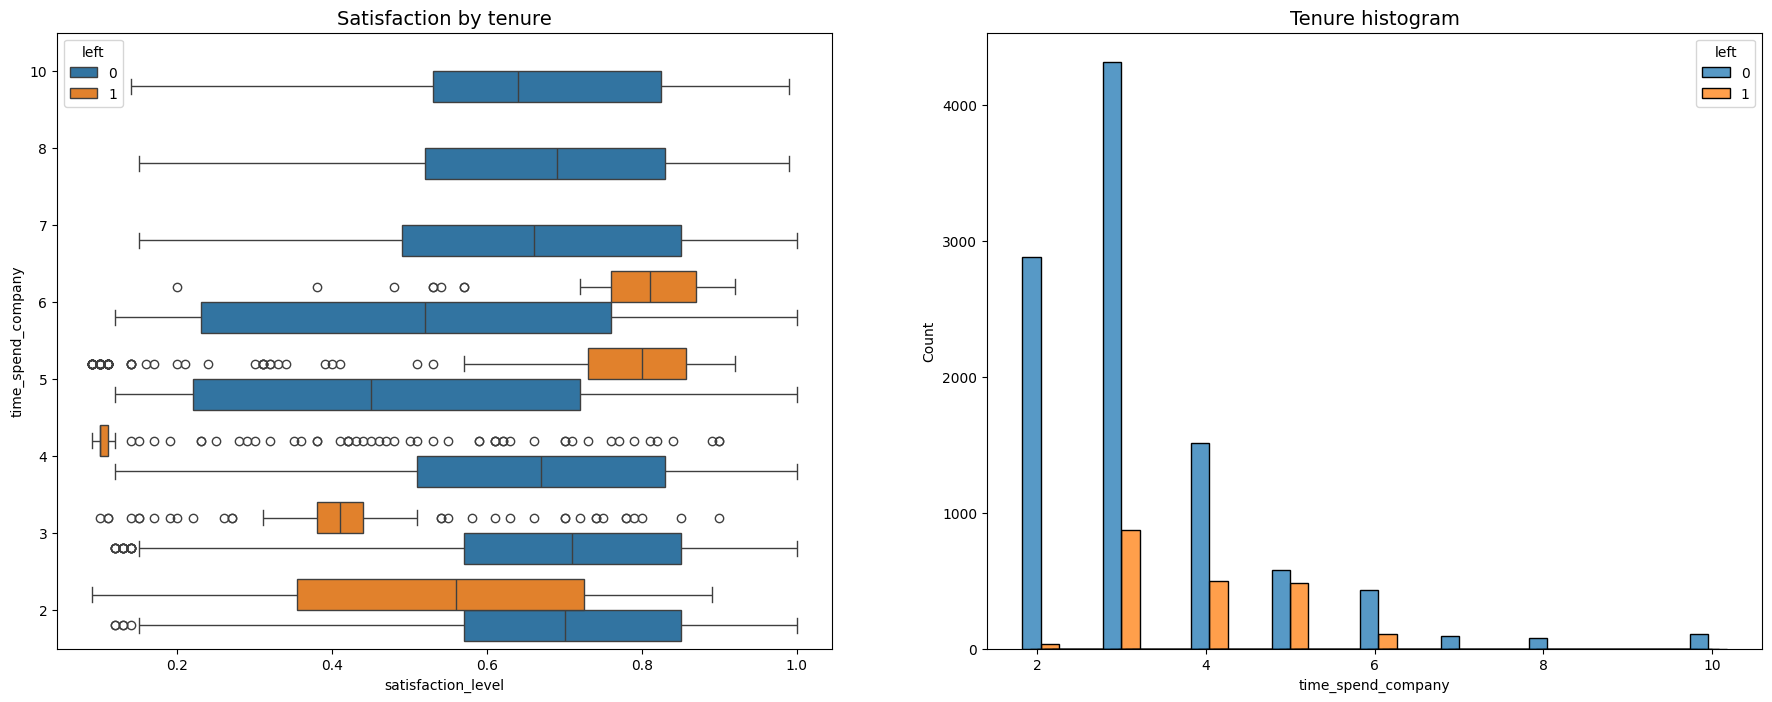

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='satisfaction_level', y='time_spend_company', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['time_spend_company']
tenure_left = df[df['left']==1]['time_spend_company']
sns.histplot(data=df, x='time_spend_company', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

* Most of the employees who left spent 2-4 years with the company. An they showed the lowest unsatisfactory averages in this period.

* Employees who left the company never stayed 7 or more tears with the company.


Text(0.5, 1.0, 'Monthly hours by last evaluation score')

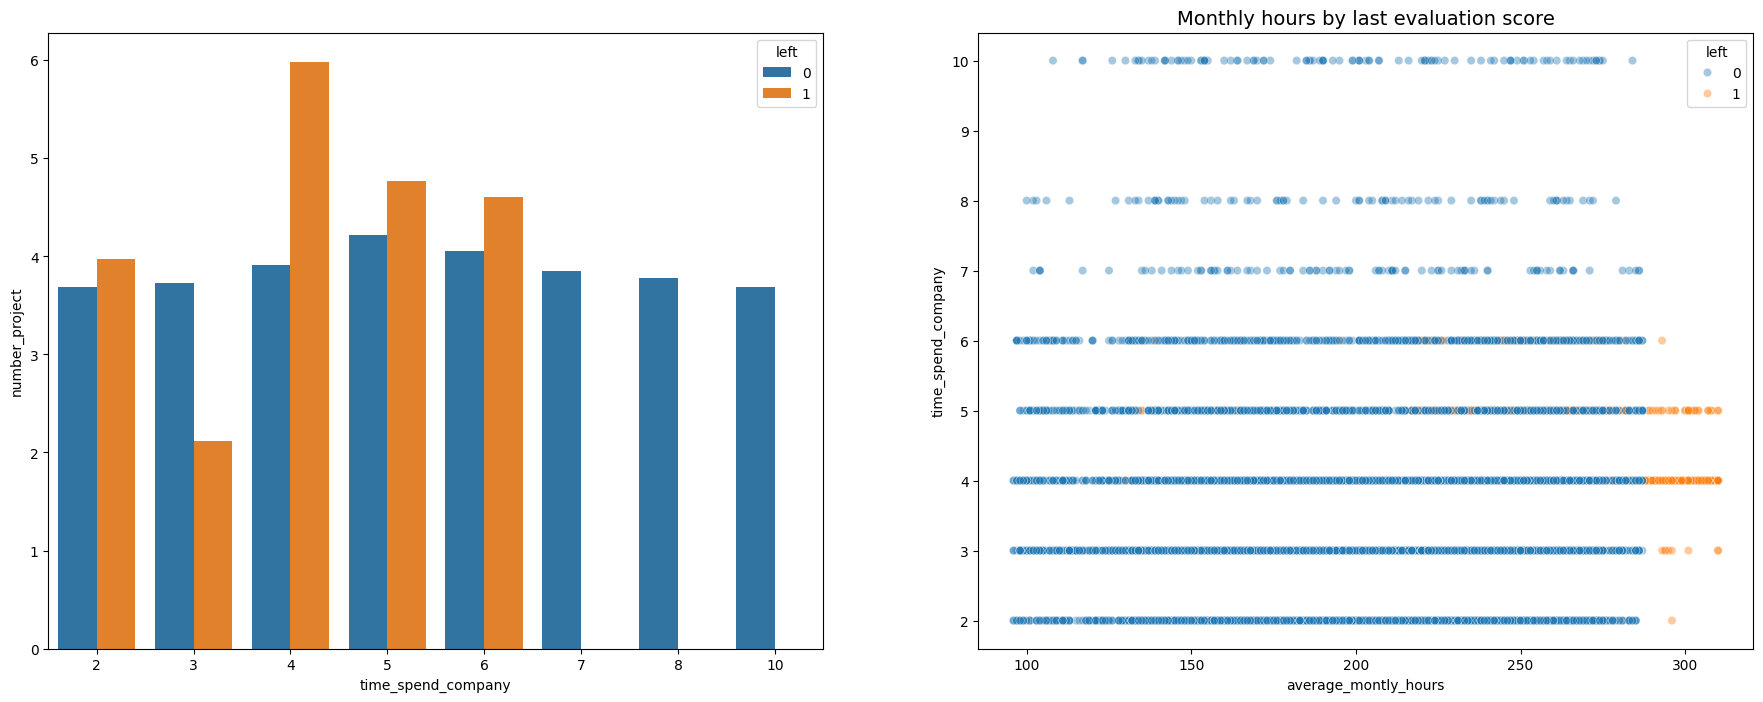

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.barplot(data=df, x='time_spend_company', y='number_project',
            hue='left', ci=None, ax=ax[0])
plt.title('Number of projects by tenure');
sns.scatterplot(data=df, x='average_montly_hours', y='time_spend_company', hue='left', alpha=0.4, ax=ax[1])
ax[1].set_title('Monthly hours by last evaluation score', fontsize='14')

Most employees who left have the higest number of projects at 4 years, which is higher than anyone. The increase in the number of proctects as the tenure lenghtens might be one of factors causing employees to leave the company.

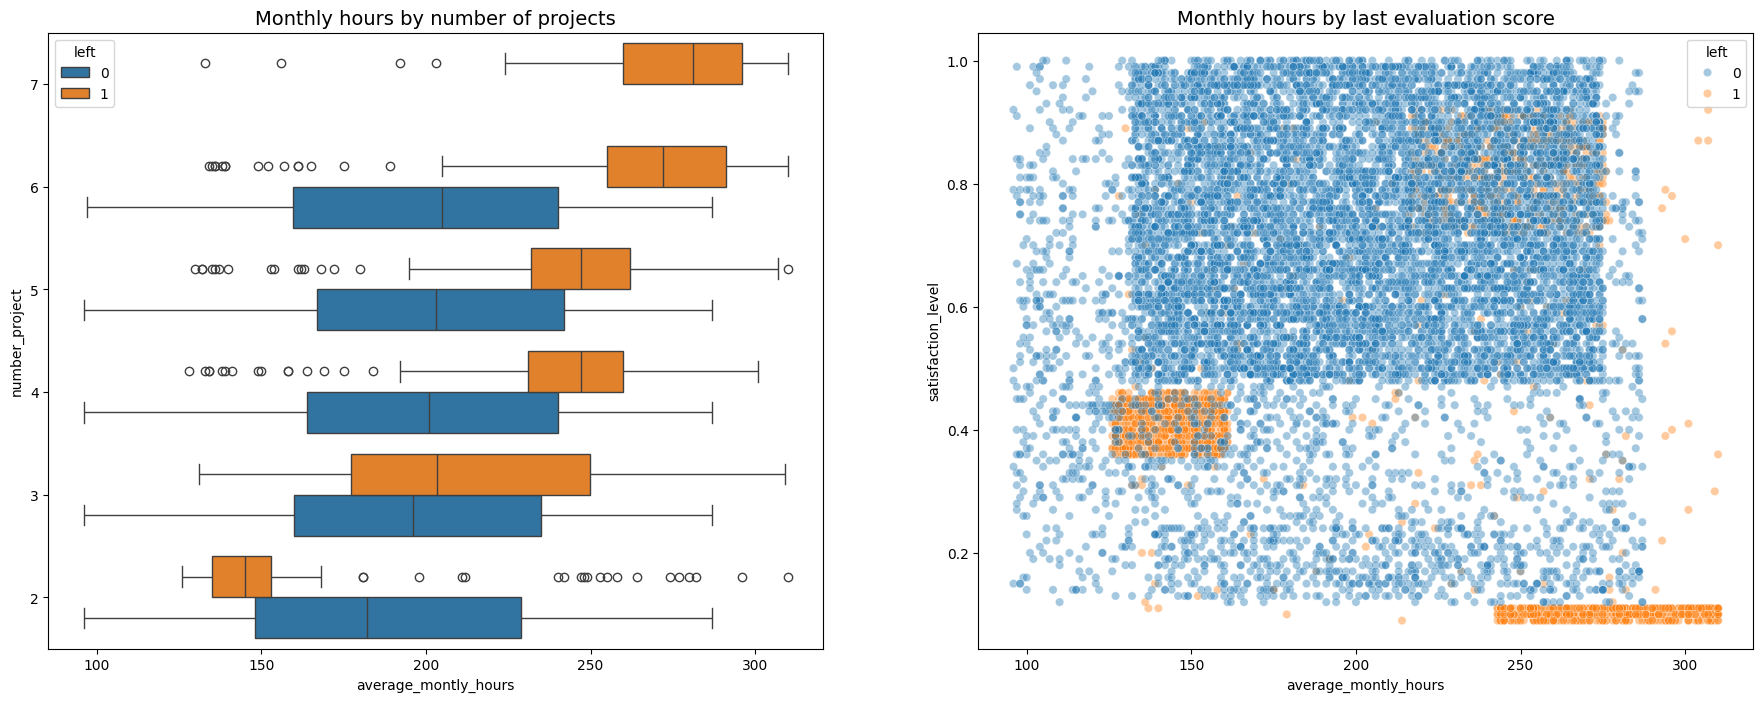

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df, x='average_montly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.scatterplot(data=df, x='average_montly_hours', y='satisfaction_level', hue='left', alpha=0.4, ax=ax[1])
ax[1].set_title('Monthly hours by last evaluation score', fontsize='14')

# Display the plots
plt.show()

Employees with most projects work most average hours as expected.

* From the mployees with who left, the ones with two projects worked least average hours(145 average hours). Their reason for leaving might be due to them being fired. But from the scatter plot these might be the employeed who showed and unsatisfactory of 0.4

* Betweeen 4-7 projects the employees who left worked the highest average hours(250-320), and at this period they showed the lowest unstatisfactory.

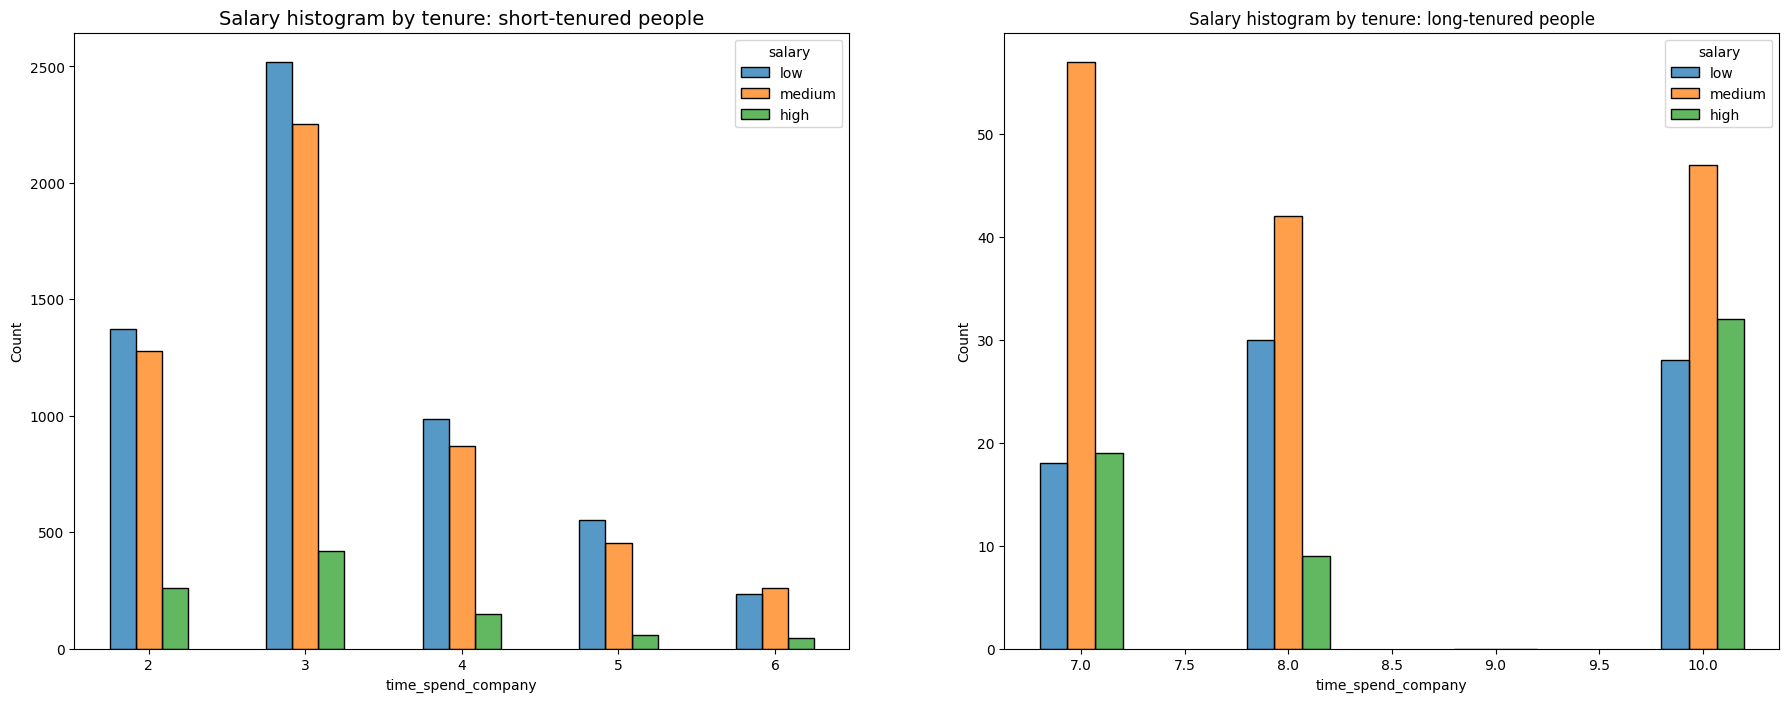

In [61]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))
# Define short-tenured employees
tenure_short = df[df['time_spend_company'] < 7]
# Define long-tenured employees
tenure_long = df[df['time_spend_company'] > 6]
# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='time_spend_company', hue='salary', discrete=1,
hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5,ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people',fontsize='14')
# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='time_spend_company', hue='salary', discrete=1,
hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4,ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people');

The plots above show that long-tenured employees were not disproportionately comprised of higherpaid
employees.

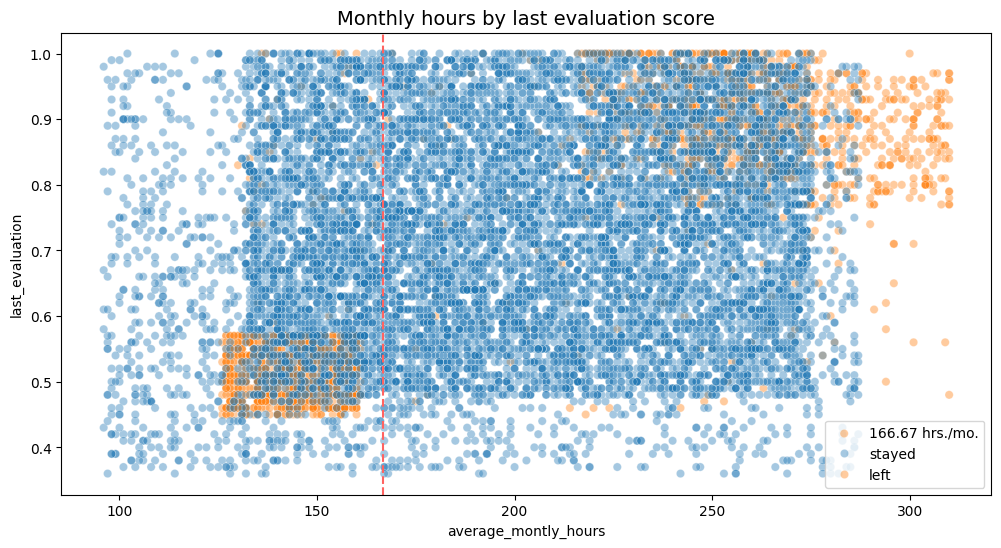

In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='average_montly_hours', y='last_evaluation',hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed','left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

In [63]:
df['Department'].value_counts()

,count
Department,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


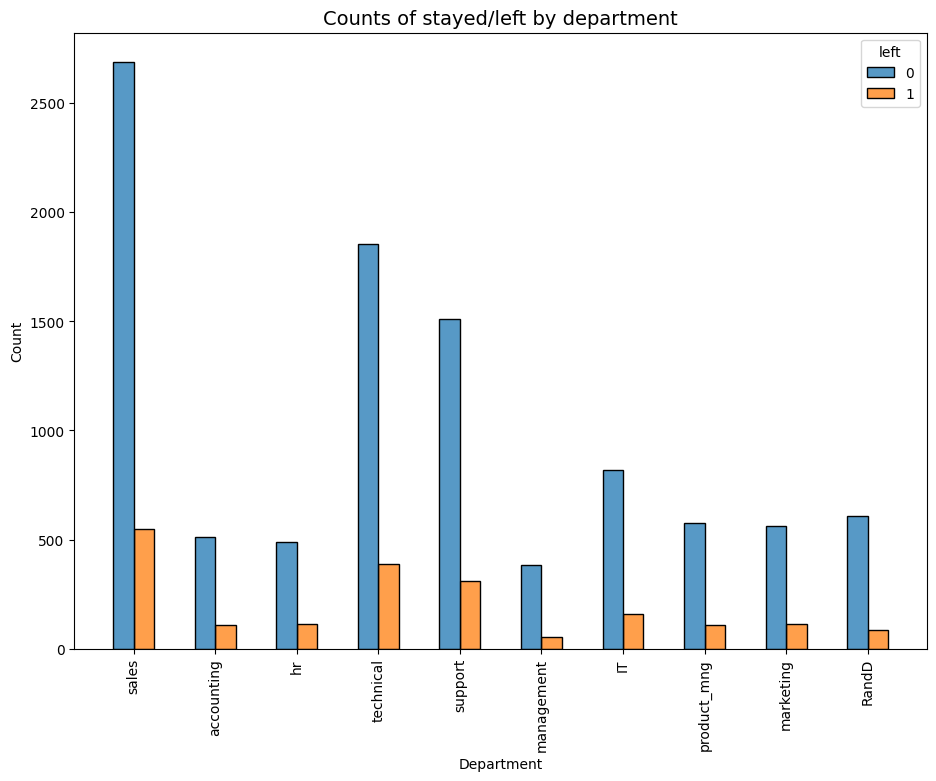

In [64]:
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='Department', hue='left', discrete=1,
hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn’t seem to be any department that differs significantly in its proportion of employees
who left to those who stayed.

#**Model Building**


#**Decision Tree**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score, precision_score, f1_score

In [66]:
X =df.drop(columns=['left'])
y = df['left']

In [67]:
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [70]:
#Instantiate and fit the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
dt_pred = dt.predict(X_test)

In [73]:
print('Accuracy:','%.3f' % accuracy_score(y_test, dt_pred))
print('Recall:','%.3f' % recall_score(y_test, dt_pred))
print('Precision:','%.3f' % precision_score(y_test, dt_pred))
print('F1 Score:','%.3f' % f1_score(y_test, dt_pred))

Accuracy: 0.970
Recall: 0.929
Precision: 0.886
F1 Score: 0.907


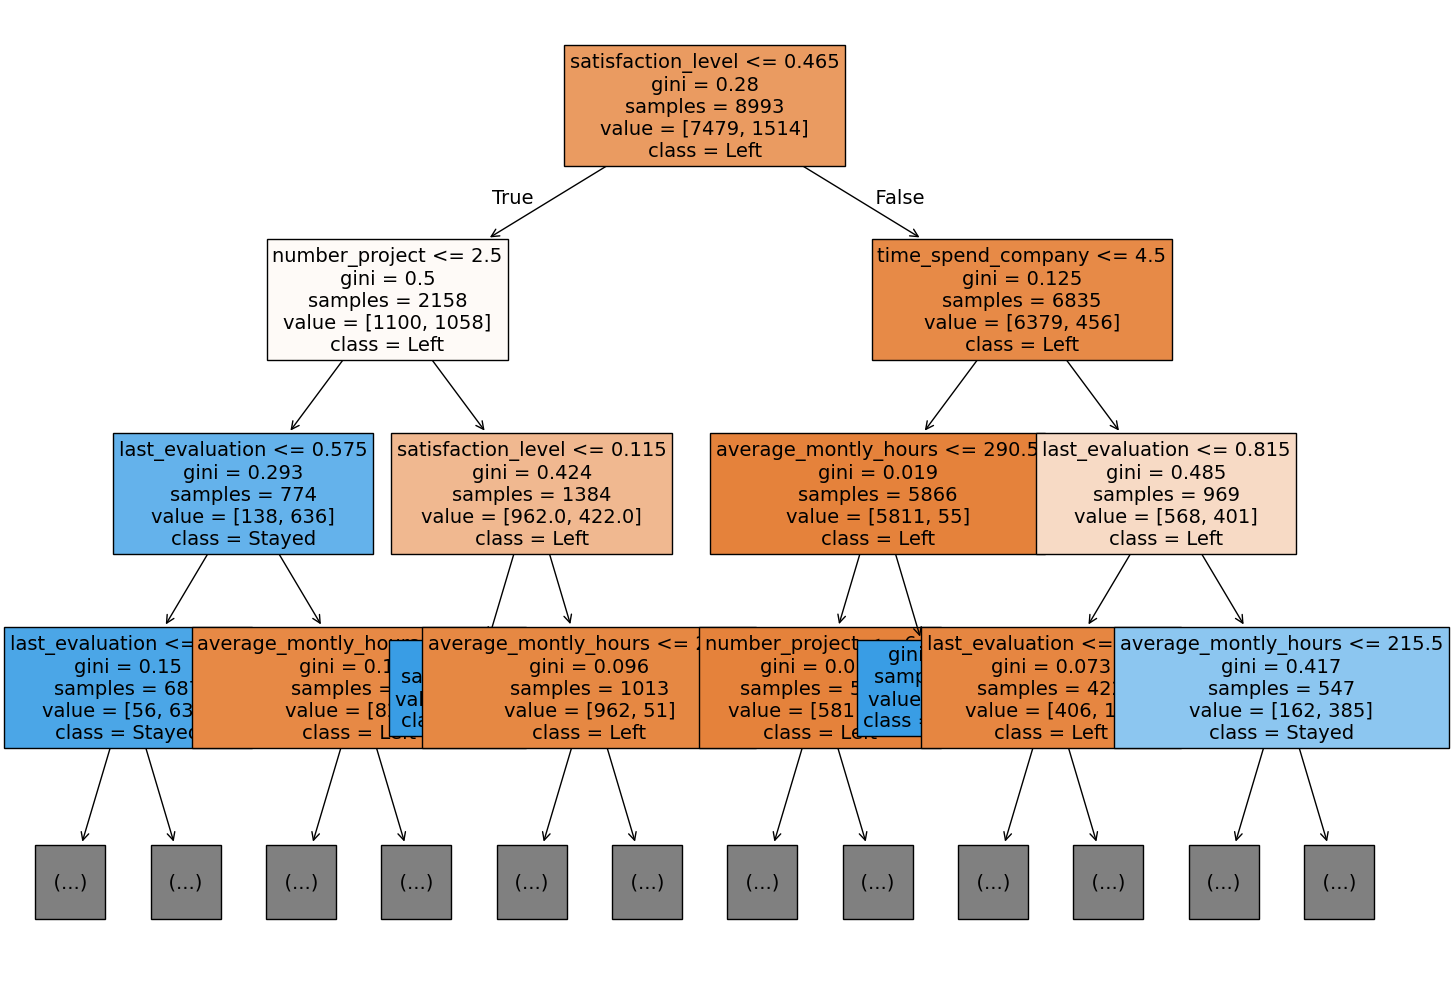

In [76]:

plt.figure(figsize=(15,10))
plot_tree(dt, max_depth=3, fontsize=14, filled=True, feature_names=X.columns,
          class_names=['Left', 'Stayed'])
plt.tight_layout()
plt.show()

**Tuning the tree**

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
tree_para = {'max_depth':[3,4,5,6,7,8,9,10,20,30,40,50],
             'min_samples_leaf': [2,5,10,20,50]
             }

In [79]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [92]:
tuned_dt = DecisionTreeClassifier()
tuned_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
clf = GridSearchCV(tuned_dt, tree_para,
                   scoring=scoring, refit='f1',
                   cv=5)

In [94]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [95]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

In [96]:
print("Best Avg. Validation Score:", "%.4f" %clf.best_score_)

Best Avg. Validation Score: 0.9458


In [97]:
results =pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'])
def make_results(model_name, model_object):
  cv_results = pd.DataFrame(model_object.cv_results_)
  best_estimator_results = cv_results.iloc[cv_results['rank_test_f1'].idxmin(), :]

  f1 = best_estimator_results['mean_test_f1']
  precision = best_estimator_results['mean_test_precision']
  recall = best_estimator_results['mean_test_recall']
  accuracy = best_estimator_results['mean_test_accuracy']

  table = pd.DataFrame([[model_name, accuracy, precision, recall, f1]], columns=['model', 'accuracy', 'precision', 'recall', 'f1'], index=[model_name])
  return table

In [111]:
results_table = make_results("Tuned Decision Tree", clf)
results_table

,model,accuracy,precision,recall,f1
Tuned Decision Tree,Tuned Decision Tree,0.982319,0.976161,0.917433,0.945782


In [99]:
def conf_matrix(model, x_data, y_data):
  model_pred = model.predict(x_data)
  cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot(values_format='')

  plt.show()


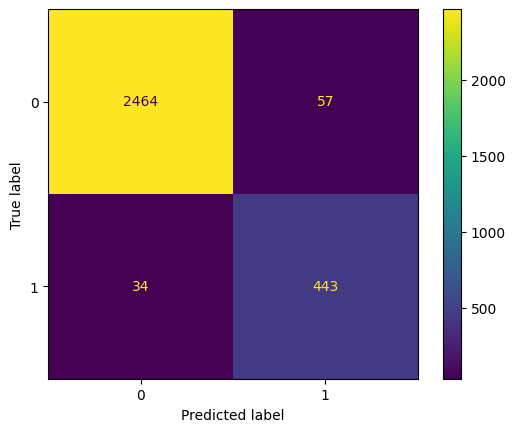

In [100]:
conf_matrix(dt, X_test, y_test);

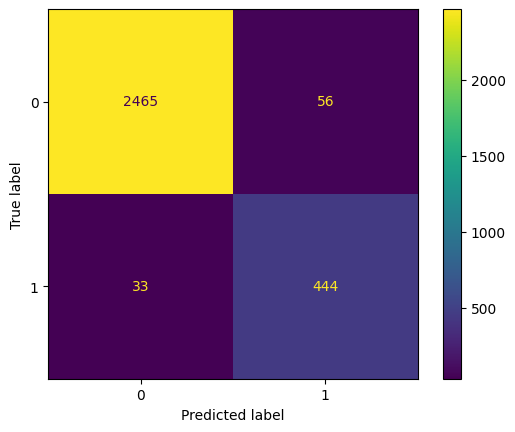

In [101]:

conf_matrix(tuned_dt, X_test, y_test);

#**Random Forest**

In [112]:
import pickle as pkl
from sklearn.ensemble import RandomForestClassifier

In [113]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25)

In [114]:
cv_param = {'n_estimators' : [50,100],
              'max_depth' : [10,50],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"],
              'max_samples' : [.5,.9]}

In [116]:
# list of split indices.
from sklearn.model_selection import PredefinedSplit
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [117]:
rf = RandomForestClassifier()

In [130]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_param, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)


In [119]:
%%time

rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: user 627 ms, sys: 122 ms, total: 749 ms
Wall time: 12.2 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [132]:
rf_pred1 = rf.predict(X_test)

In [120]:
# optimal parameters.
rf_val.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [121]:
rf_opt = RandomForestClassifier(n_estimators = 50, max_depth = 10,
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.5)

In [122]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_samples=0.5, min_samples_split=0.001,
                       n_estimators=50)

In [123]:
rf_pred = rf_opt.predict(X_test)

In [133]:
table = pd.DataFrame({'Model': ["Random Forest", "Tuned Random Forest"],
                        'F1':  [ f1_score(y_test, rf_pred1), f1_score(y_test, rf_pred)],
                        'Recall': [recall_score(y_test, rf_pred1), recall_score(y_test, rf_pred)],
                        'Precision': [precision_score(y_test, rf_pred1), precision_score(y_test, rf_pred)],
                        'Accuracy': [ accuracy_score(y_test, rf_pred1), accuracy_score(y_test, rf_pred)]
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.945946,0.911824,0.982721,0.982655
1,Tuned Random Forest,0.940810,0.907816,0.976293,0.980987


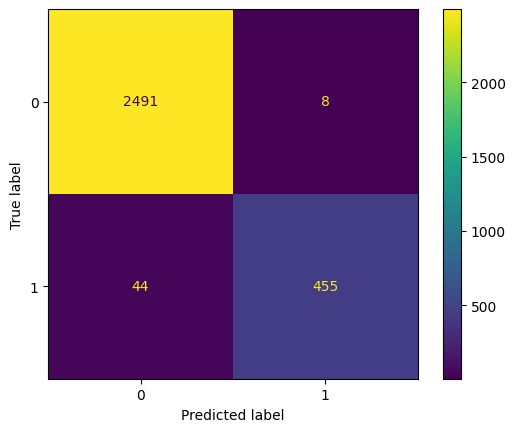

In [134]:
conf_matrix(rf, X_test, y_test);

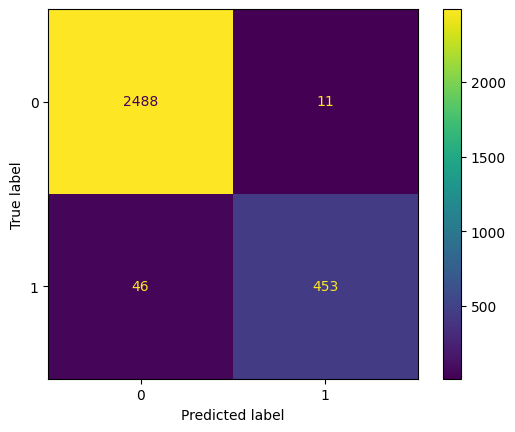

In [135]:
conf_matrix(rf_opt, X_test, y_test);

#**XGBoost**

In [136]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [138]:
xgb = XGBClassifier(objective = 'binary:logistic')

In [139]:
cv_param = {'max_depth':[4,6],
            'min_child_weight':[3,5],
            'learning_rate':[0.1, 0.2, 0.3],
            'n_estimators':[5, 10, 15],
            'subsample':[0.7],
            'colsample_bytree':[0.7]
            }


In [140]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [141]:
gxb_cv = GridSearchCV(xgb, cv_param,
                   scoring=scoring, refit='f1',
                   cv=5)

In [142]:
%%time
gxb_cv.fit(X_train, y_train)

CPU times: user 27.3 s, sys: 49.8 ms, total: 27.4 s
Wall time: 21.2 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

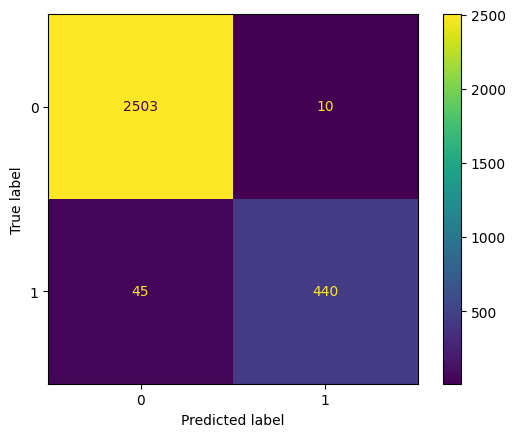

In [143]:
conf_matrix(gxb_cv, X_test, y_test)

In [144]:
gx_pred = gxb_cv.predict(X_test)

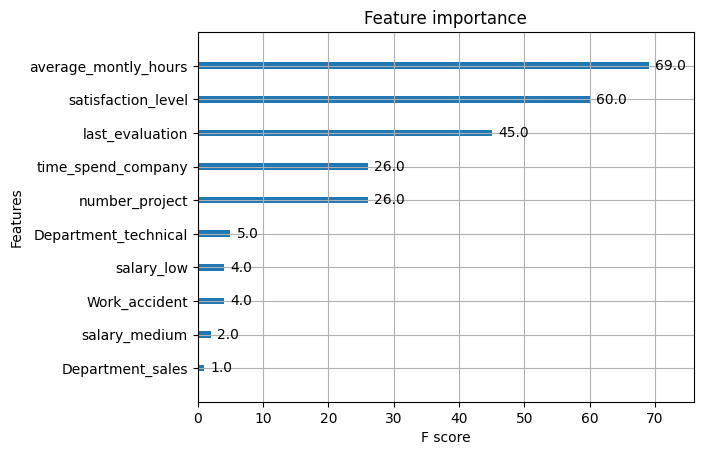

In [145]:

plot_importance(gxb_cv.best_estimator_)
plt.show()

In [146]:

table = pd.DataFrame({'Model': ["GXBoost", "Tuned Random Forest"],
                        'F1':  [ f1_score(y_test, gx_pred), f1_score(y_test, rf_pred)],
                        'Recall': [recall_score(y_test, gx_pred), recall_score(y_test, rf_pred)],
                        'Precision': [precision_score(y_test, gx_pred), precision_score(y_test, rf_pred)],
                        'Accuracy': [ accuracy_score(y_test, gx_pred), accuracy_score(y_test, rf_pred)]
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,GXBoost,0.941176,0.907216,0.977778,0.981654
1,Tuned Random Forest,0.158061,0.154639,0.161638,0.733489
